In [1]:
from utils.plotter import get_roc_curves_from_df
from utils.wandb_calls import fetch_files_from_runs
import os
import pandas as pd
import pickle
import shutil

In [2]:
from utils.get_circuit_discovery_scores import get_realism_scores
acdc_realism = get_realism_scores(weight="", algorithm="acdc")
node_sp_realism = get_realism_scores(weight="", algorithm="node_sp")

/Users/cybershiptrooper/src/interpretability/MATS/circuits-benchmark/notebooks/utils/get_circuit_discovery_scores.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([
/Users/cybershiptrooper/src/interpretability/MATS/circuits-benchmark/notebooks/utils/get_circuit_discovery_scores.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([


In [3]:
acdc_510_realism

,run,threshold,score,weights
0,8,100.00000,0.212377,100
1,8,50.00000,0.212377,100
2,11,100.00000,0.449420,100
3,8,20.00000,0.212377,100
4,11,50.00000,0.449420,100
...,...,...,...,...
291,8,0.00000,0.214126,tracr
292,3,0.00000,0.231445,510
293,3,0.00001,0.285938,tracr
294,24,0.00000,1.000000,tracr


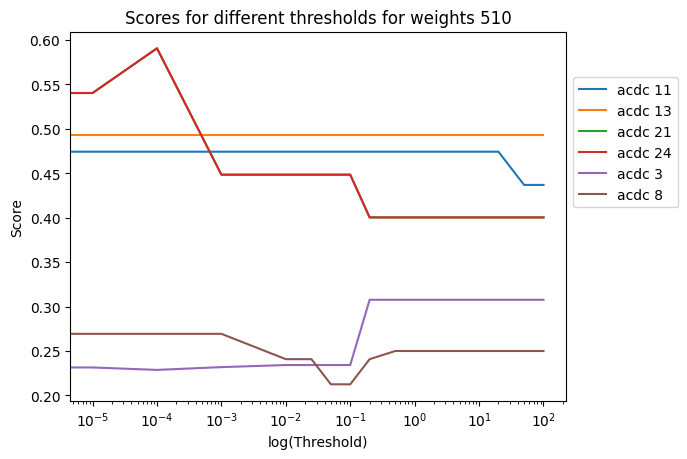

In [10]:
import matplotlib.pyplot as plt
import numpy as np
def plot_scores_for_weights(df, weights, algorithm = "acdc"):
    if algorithm == "acdc":
        sort_key = "threshold"
        ascending = False
    elif "sp" in algorithm:
        sort_key = "lambda"
        ascending = True
    for run, group in df[df["weights"] == weights].groupby("run"):
        group = group.sort_values(by=sort_key, ascending=ascending)
        plt.plot(group[sort_key],
                group["score"], 
                label=f"{algorithm} {run}")
        # plot in log scale
        plt.xscale("log")

    plt.legend()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.7))

    plt.xlabel("log(Threshold)")
    plt.ylabel("Score")
    plt.title(f"Scores for different thresholds for weights {weights}")
    plt.show()

plot_scores_for_weights(acdc_realism, "510")

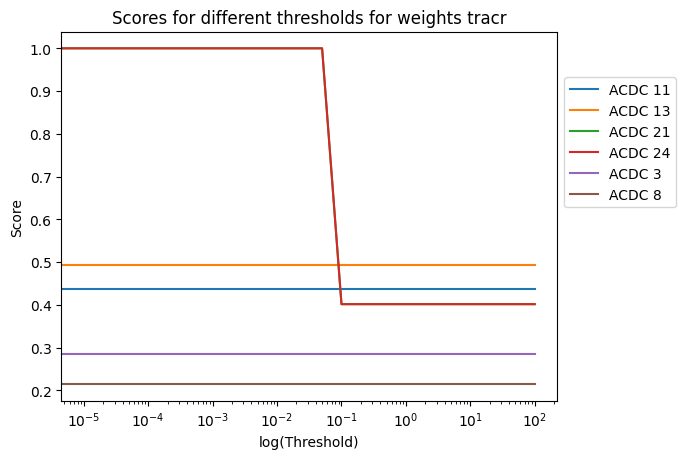

In [7]:
plot_scores_for_weights(acdc_realism, "tracr")

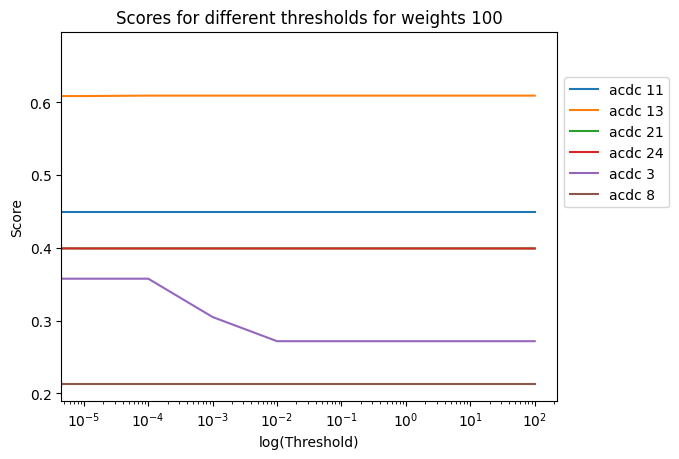

In [13]:
plot_scores_for_weights(acdc_realism, "100")

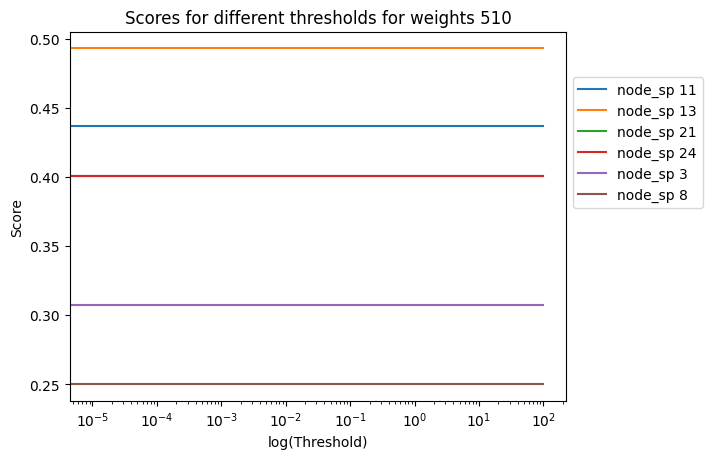

In [14]:
plot_scores_for_weights(node_sp_realism, "510", algorithm="node_sp")